In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<Axes: >

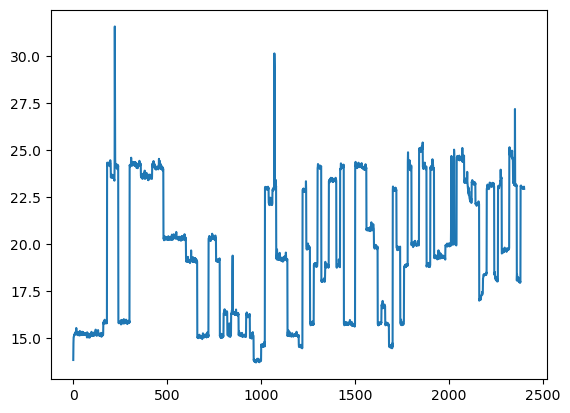

In [3]:
df.time.plot()

In [4]:
df_grouped_perm = df.groupby('permutation').mean().sort_values(by='time')
display(df_grouped_perm)

fastest_10_permutations = df_grouped_perm.head(10)
display(fastest_10_permutations)

slowest_10_permutations = df_grouped_perm.tail(10)
display(slowest_10_permutations)

fastest_30_permutations = df_grouped_perm.head(30)
slowest_30_permutations = df_grouped_perm.tail(30)

,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
...,...
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228


,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
"(1, 2, 3, 4, 0)",15.057650
"(1, 2, 4, 0, 3)",15.079992
"(1, 4, 3, 2, 0)",15.099834
"(1, 3, 2, 4, 0)",15.100835


,time
permutation,
"(3, 2, 4, 1, 0)",24.188350
"(0, 3, 4, 2, 1)",24.208164
"(0, 3, 4, 1, 2)",24.237657
"(0, 3, 2, 4, 1)",24.253912
"(0, 2, 3, 4, 1)",24.266008
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228
"(4, 3, 1, 0, 2)",24.756552


In [5]:
# Group the fastest four permutations to prepare scores for ANOVA
top4 = df_grouped_perm.head(4)
top_12 = top4.head(2)
top_34= top4.tail(2)

# Single out fastest and second fastest permutation
single_top1 = df_grouped_perm.head(1)
single_top2 = top_12.tail(1)

# Group the slowest four permutations to prepare scores for ANOVA
bottom4 = df_grouped_perm.tail(4)
bottom_12 = bottom4.tail(2)
bottom_34 = bottom4.head(2)

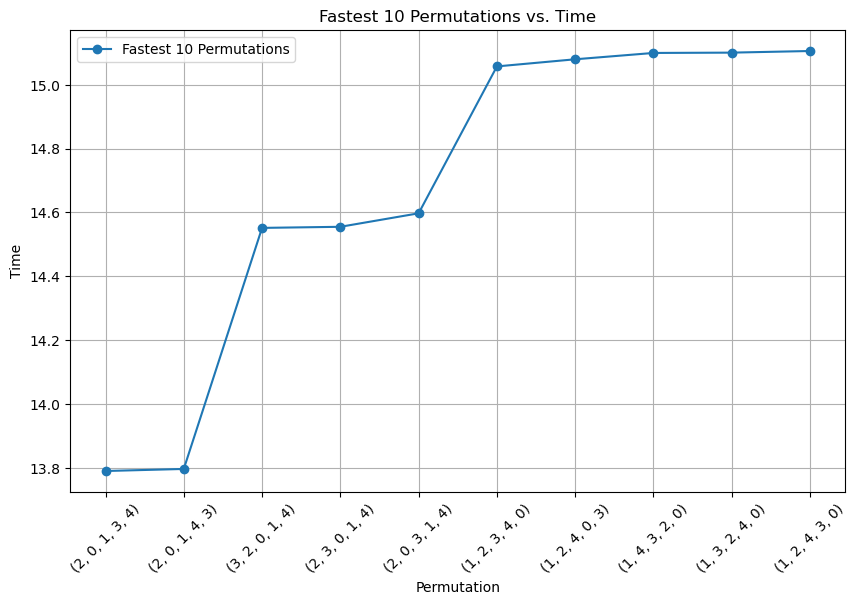

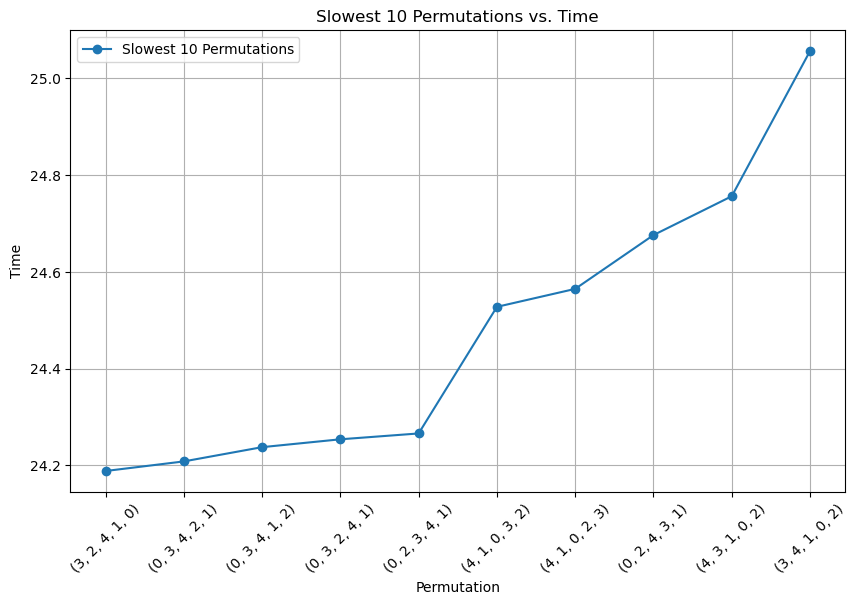

In [6]:
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(fastest_10_permutations.index, fastest_10_permutations['time'], marker='o', label='Fastest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Fastest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

# Plotting the slowest 10 permutations as a line plot
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(slowest_10_permutations.index, slowest_10_permutations['time'], marker='o', label='Slowest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Slowest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

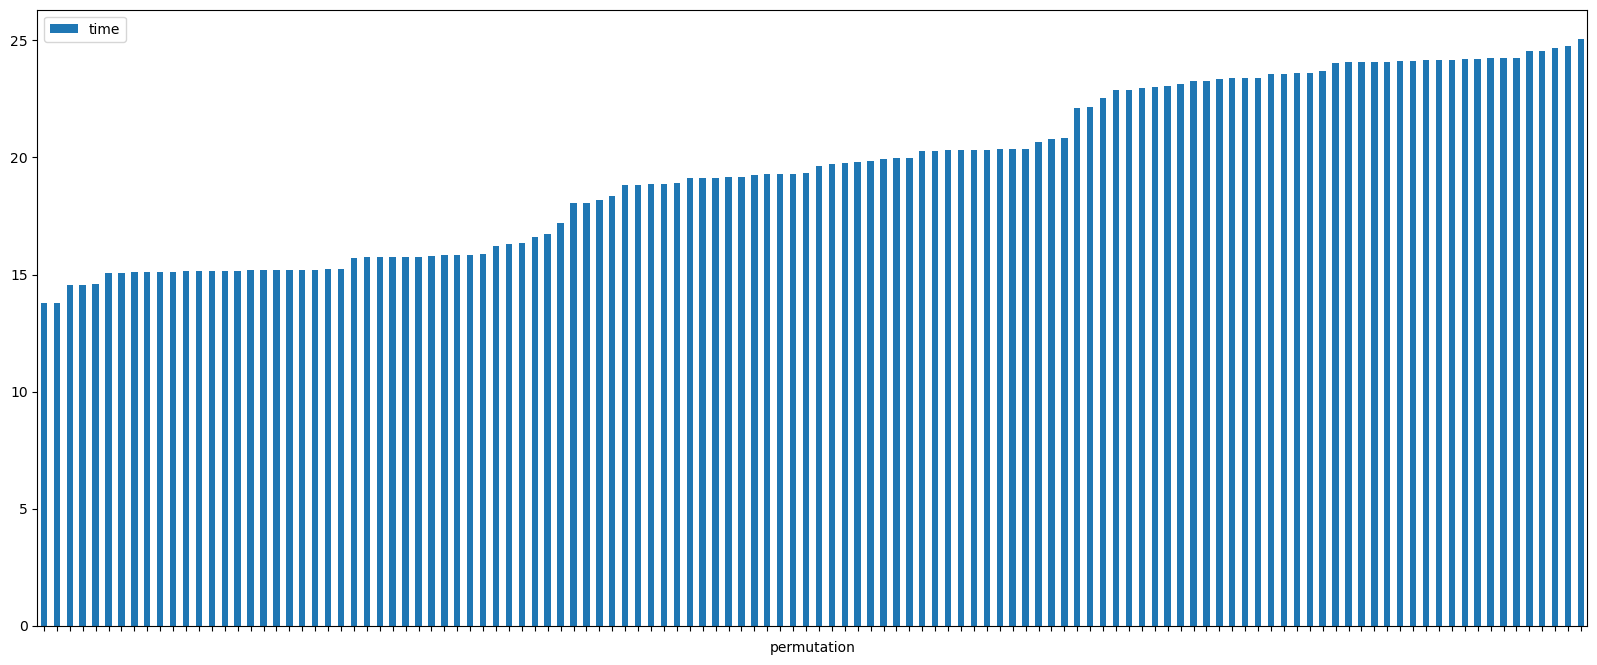

In [7]:
plotted = df_grouped_perm.plot(kind='bar', figsize=(20, 8)) 

# Rotate the x-axis labels 
plotted.set_xticklabels([])
plt.show()

In [8]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<Axes: >

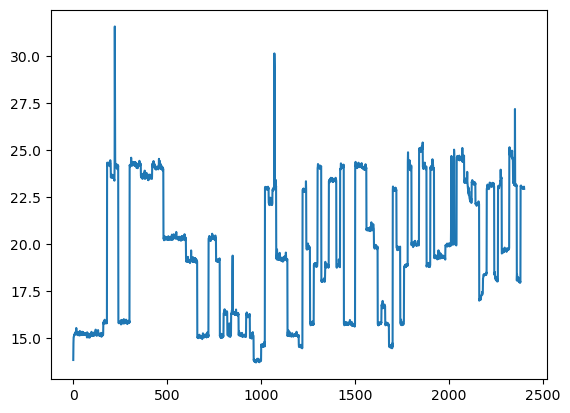

In [9]:
df.time.plot()

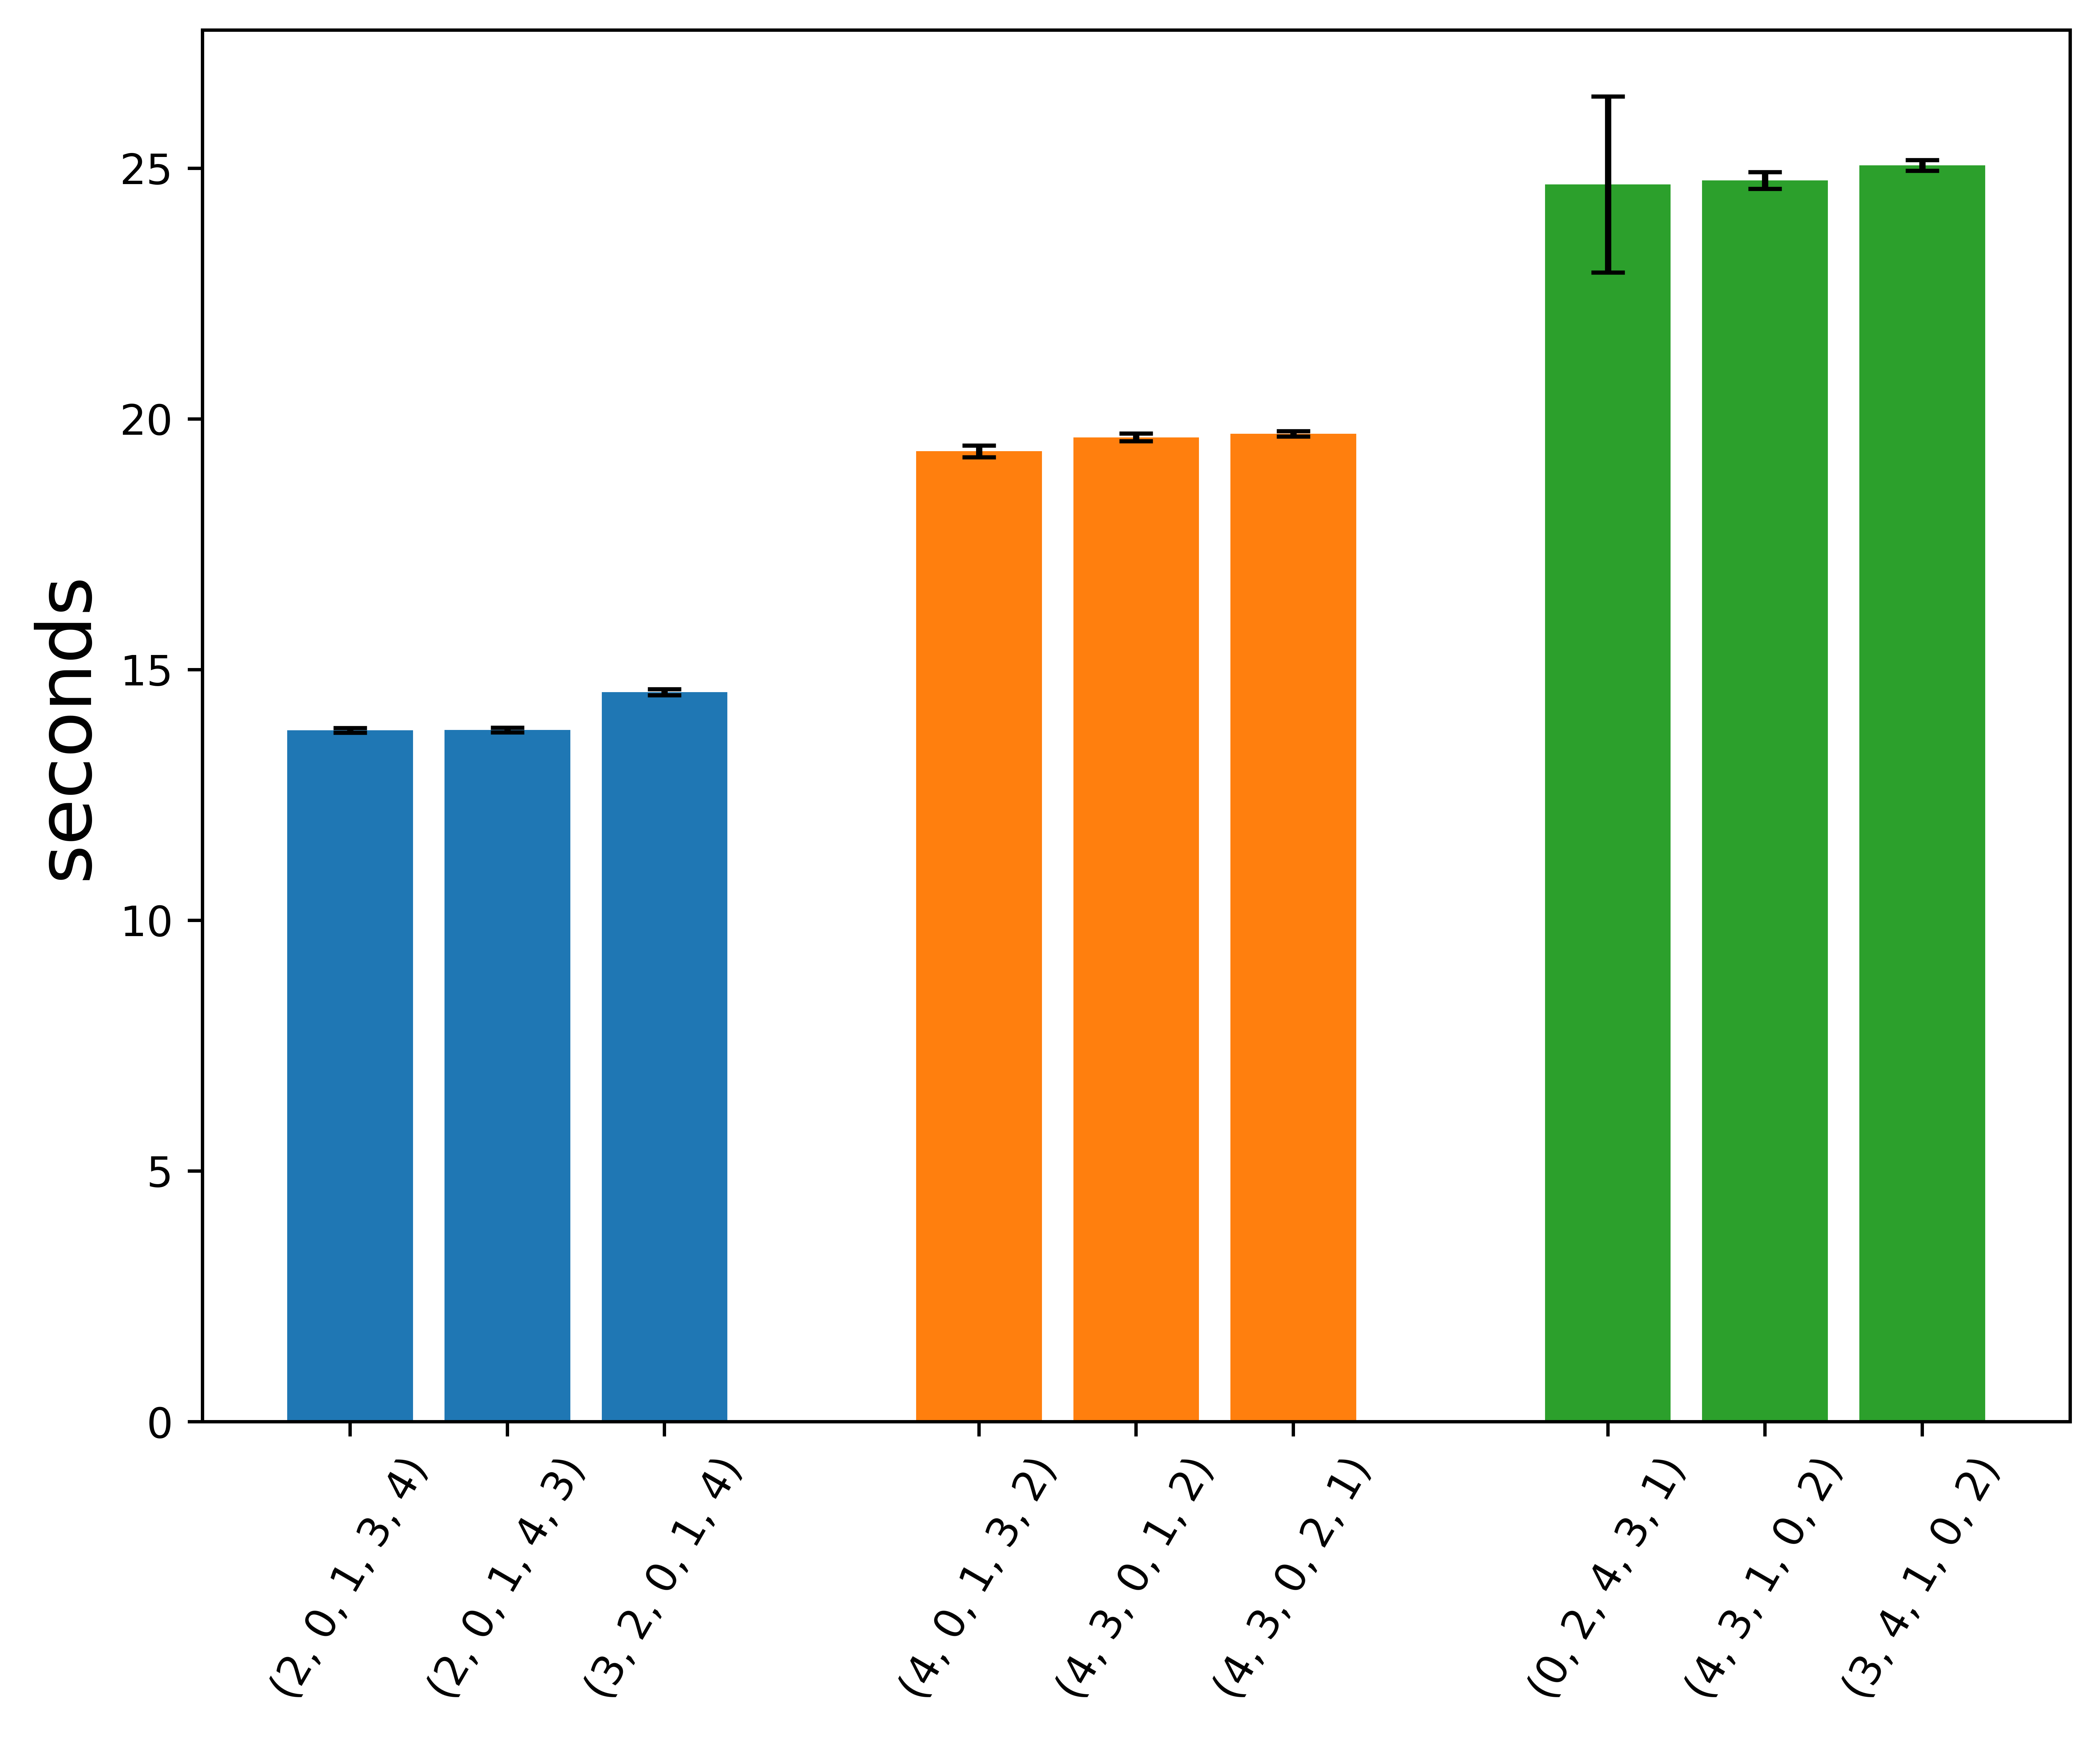

In [10]:
df_grouped_perm = df_grouped_perm.merge(df.groupby('permutation').std(), left_index=True, right_index=True)
xticks = [[], []]
plt.figure(figsize=(8, 6), dpi=900)
for i, f in zip(range(0, 11, 4), [df_grouped_perm.iloc[:3],
                               df_grouped_perm.iloc[len(df_grouped_perm)//2-1:len(df_grouped_perm)//2+2],
                               df_grouped_perm.iloc[-3:]]):
    plt.bar(np.arange(3) + i, f.time_x)
    for j, (_, row) in zip(np.arange(3) + i, f.iterrows()):
        plt.errorbar(j, row.time_x, row.time_y, c='black', capsize=4)
    xticks[0].extend(np.arange(3) + i)
    xticks[1].extend(f.index)
plt.xticks(*xticks, rotation=60)
plt.ylabel('seconds', fontsize=18)
plt.savefig("sparse_bars.png", bbox_inches='tight')
plt.show()

In [11]:
from scipy.stats import f_oneway


# Create lists of times 
fastest_times_values = fastest_30_permutations['time'].values.tolist()
slowest_times_values = slowest_30_permutations['time'].values.tolist()

# Perform ANOVA test
f_statistic, p_value = f_oneway(fastest_times_values, slowest_times_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the fastest 30 permutations and the slowest 30 permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the fastest 30 permutations and the slowest 30 permutations.")
print('')
print('')

# Performa ANOVA with top (1, 2) and top (3, 4)
# Create lists of times 
top_12_values = top_12['time'].values.tolist()
top_23_values = top_34['time'].values.tolist()

f_statistic, p_value = f_oneway(top_12_values, top_23_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.")
print('')
print('')

# Performa ANOVA with bpttom (1, 2) and bottom (3, 4)
# Create lists of times 
bottom_12_values = bottom_12['time'].values.tolist()
bottom_23_values = bottom_34['time'].values.tolist()

f_statistic, p_value = f_oneway(bottom_12, bottom_34)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.")


ANOVA F-Statistic: 5361.002986128065
ANOVA p-value: 7.522498106944917e-59
Reject the null hypothesis: There is a significant difference between means of the fastest 30 permutations and the slowest 30 permutations.


ANOVA F-Statistic: 43266.95976484648
ANOVA p-value: 2.311152293306241e-05
Reject the null hypothesis: There is a significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.


ANOVA F-Statistic: [3.19254502]
ANOVA p-value: [0.2158875]
Fail to reject the null hypothesis: There is no significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.


In [12]:
df_grouped_for_ttest = df.groupby('permutation').head(5)

print(df.groupby('permutation'))
print(df_grouped_for_ttest)


# Filter the DataFrame for a specific permutation
best_permutation = '(2, 0, 1, 3, 4)'
secondbest_permutation = '(2, 0, 1, 4, 3)'

best_permutation_values = df_grouped_for_ttest[df_grouped_for_ttest['permutation'] == best_permutation]['time'].tolist()
secondbest_permutation_values = df_grouped_for_ttest[df_grouped_for_ttest['permutation'] == secondbest_permutation]['time'].tolist()


# Print the list of time values for the specific permutation
print(best_permutation_values)
print(secondbest_permutation_values)

          permutation       time
0     (0, 1, 2, 3, 4)  13.826996
1     (0, 1, 2, 3, 4)  14.719000
2     (0, 1, 2, 3, 4)  15.049000
3     (0, 1, 2, 3, 4)  15.058002
4     (0, 1, 2, 3, 4)  15.136001
...               ...        ...
2380  (4, 3, 2, 1, 0)  23.093000
2381  (4, 3, 2, 1, 0)  23.070251
2382  (4, 3, 2, 1, 0)  23.113009
2383  (4, 3, 2, 1, 0)  23.108000
2384  (4, 3, 2, 1, 0)  23.020028

[600 rows x 2 columns]
[13.807001, 13.858001, 13.848001, 13.776001, 13.736001]
[13.760027, 13.806027, 13.771, 13.895001, 13.814014]


In [13]:
from scipy.stats import ttest_ind

# Perform a t-test with slowest permutation against 2nd slowest
t_statistic, p_value_t = ttest_ind(best_permutation_values, secondbest_permutation_values)
print("Two samples t-statistic:", t_statistic)
print("Two samples t-test p-value:", p_value_t)

alpha = 0.05  # Set the significance level
if p_value_t < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation")


Two samples t-statistic: -0.12838093203910683
Two samples t-test p-value: 0.9010162345343989
Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation


### Analysis of data2

In [14]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df


,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


In [16]:
from datetime import datetime, timedelta

def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")

    # Convert hours and minutes to seconds and add them to the total
    return timedelta(minutes=t.minute, seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df_2 = pd.read_csv('data2.csv', delimiter='|')
df_2.time = df_2.time.map(strptime)
df_2

,permutation,time
0,"(2, 0, 1, 3, 4)",69.300627
1,"(2, 0, 1, 3, 4)",67.769971
2,"(2, 0, 1, 3, 4)",67.435219
3,"(2, 0, 1, 3, 4)",67.610678
4,"(2, 0, 1, 3, 4)",68.693848
...,...,...
95,"(3, 4, 1, 0, 2)",75.930840
96,"(3, 4, 1, 0, 2)",76.091937
97,"(3, 4, 1, 0, 2)",75.960615
98,"(3, 4, 1, 0, 2)",75.895271


In [17]:
df_grouped_perm = df_2.groupby('permutation').agg({'time': ['mean', 'std']}).reset_index()

# Sort the DataFrame by mean 'time' in ascending order
df_grouped_perm = df_grouped_perm.sort_values(by=('time', 'mean'))

# Rename the columns for clarity
df_grouped_perm.columns = ['Permutation', 'Mean Time', 'Standard Deviation']

# Display the DataFrame
display(df_grouped_perm)

,Permutation,Mean Time,Standard Deviation
1,"(2, 0, 1, 4, 3)",66.593579,0.117798
0,"(2, 0, 1, 3, 4)",68.131962,0.958849
3,"(4, 3, 0, 1, 2)",70.986453,0.090778
4,"(4, 3, 1, 0, 2)",74.994032,0.062174
2,"(3, 4, 1, 0, 2)",76.280996,1.056417


In [23]:
# Group by 'permutation'
df_grouped_for_ttest = df_2.groupby('permutation')

# Display the grouped DataFrame
display(df_grouped_for_ttest)

# Filter the DataFrame for a specific permutation
best_permutation = '(2, 0, 1, 3, 4)'
secondbest_permutation = '(2, 0, 1, 4, 3)'

worst_permutation = '(4, 3, 1, 0, 2)'
second_worst_permutation = '(3, 4, 1, 0, 2)'

# Aggregate the 'time' values for the specific permutations and convert them to lists
best_permutation_values = df_grouped_for_ttest.get_group(best_permutation)['time'].tolist()
secondbest_permutation_values = df_grouped_for_ttest.get_group(secondbest_permutation)['time'].tolist()

worst_permutation_values = df_grouped_for_ttest.get_group(worst_permutation)['time'].tolist()
secondworst_permutation_values = df_grouped_for_ttest.get_group(second_worst_permutation)['time'].tolist()

# Print the list of time values for the specific permutations
print(best_permutation_values)
print(secondbest_permutation_values)

[69.300627, 67.769971, 67.435219, 67.610678, 68.693848, 69.061458, 68.305954, 70.033421, 70.646092, 68.606081, 67.589909, 67.51588, 67.372393, 67.484938, 67.56287, 67.49426, 67.568486, 67.522898, 67.665795, 67.398457]
[66.567274, 66.606825, 66.445488, 66.58498, 66.502531, 66.661874, 66.618781, 66.709073, 66.7632, 66.680373, 66.614743, 66.573497, 66.84727, 66.740061, 66.581053, 66.576561, 66.508939, 66.387413, 66.450055, 66.451581]


In [24]:
from scipy.stats import ttest_ind

# Perform a t-test with slowest permutation against 2nd slowest
t_statistic, p_value_t = ttest_ind(worst_permutation_values, secondworst_permutation_values)
print("Two samples t-statistic:", t_statistic)
print("Two samples t-test p-value:", p_value_t)

alpha = 0.05  # Set the significance level
if p_value_t < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation")


Two samples t-statistic: -5.438703457803604
Two samples t-test p-value: 3.3495712067452755e-06
Reject the null hypothesis: There is a significant difference between means.


In [26]:
from scipy.stats import ttest_ind

# Perform a t-test with slowest permutation against 2nd slowest
t_statistic, p_value_t = ttest_ind(best_permutation_values, secondbest_permutation_values)
print("Two samples t-statistic:", t_statistic)
print("Two samples t-test p-value:", p_value_t)

alpha = 0.05  # Set the significance level
if p_value_t < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation")


Two samples t-statistic: 7.121580283330594
Two samples t-test p-value: 1.684932852188292e-08
Reject the null hypothesis: There is a significant difference between means.
